In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


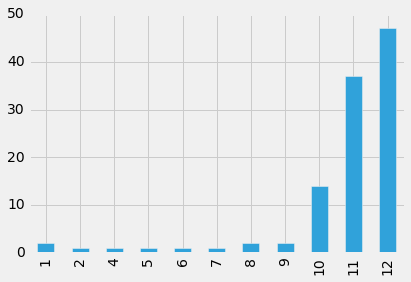

In [18]:
r = release_dates[(release_dates.title.str.contains('Christmas')) &
                  (release_dates.country == 'USA')]

r.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

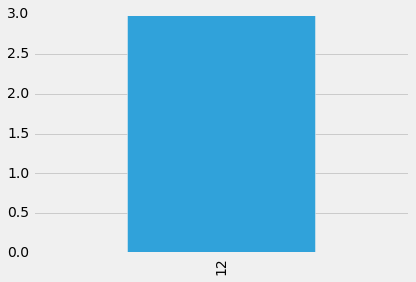

In [19]:
r = release_dates[(release_dates.title.str.startswith('The Hobbit')) &
                  (release_dates.country == 'USA')]

r.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

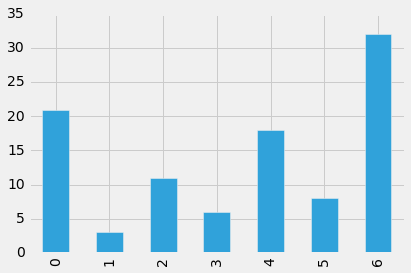

In [20]:
r = release_dates[(release_dates.title.str.contains('Romance')) &
                  (release_dates.country == 'USA')]

r.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

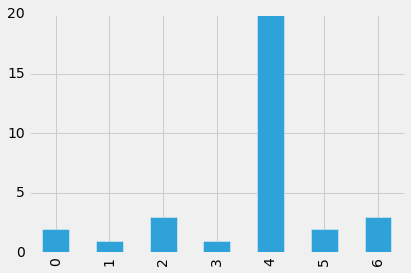

In [21]:
r = release_dates[(release_dates.title.str.contains('Action')) &
                  (release_dates.country == 'USA')]

r.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [26]:
c = cast[(cast.name.str.contains('Judi Dench'))]
c = c.merge(release_dates,on='title')


In [30]:
c.sort_values('date').head(7)

,title,year_x,name,type,character,n,year_y,country,date
357,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,1910,USA,1910-02-02
586,Jane Eyre,2011,Judi Dench,actress,Mrs. Fairfax,18.0,1910,USA,1910-05-06
358,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,1911,Denmark,1911-02-27
359,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,1911,UK,1911-03-18
360,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,1911,USA,1911-04-15
361,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,1921,Finland,1921-01-10
362,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,1921,Denmark,1921-01-26


### In which months do films with Judi Dench tend to be released in the USA?

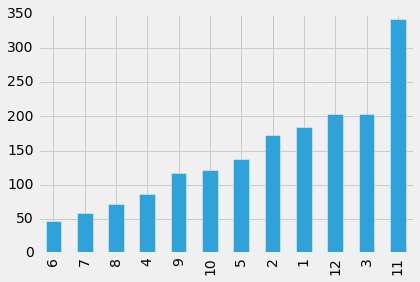

In [32]:
c['m'] = c.date.dt.month
c.m.value_counts().sort_values().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [33]:
c = cast[(cast.name.str.contains('Tom Cruise'))]
r = release_dates[release_dates.country == 'USA']
c = c.merge(r,on='title')



In [34]:
c.head()

,title,year_x,name,type,character,n,year_y,country,date
0,A Few Good Men,1992,Tom Cruise,actor,Lt. Daniel Kaffee,1.0,1992,USA,1992-12-11
1,All the Right Moves,1983,Tom Cruise,actor,Stefen Djordjevic,1.0,1983,USA,1983-10-21
2,American Made,2017,Tom Cruise,actor,Barry Seal,NaN,2017,USA,2017-09-29
3,August,2008,Tom Cruise,actor,Himself,NaN,1996,USA,1996-04-19
4,Austin Powers in Goldmember,2002,Tom Cruise,actor,Himself,81.0,2002,USA,2002-07-26


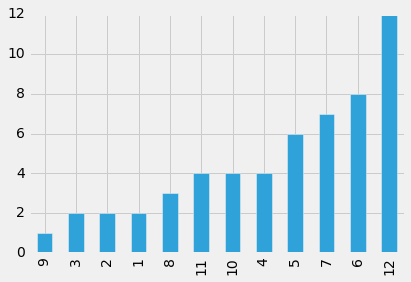

In [35]:
c['m'] = c.date.dt.month
c.m.value_counts().sort_values().plot(kind='bar')